In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from experiments import (
    get_experiment_name,
    BATCH_SIZE_EXPERIMENTS__SHARED_MEMORY_OFF__PART1, BATCH_SIZE_EXPERIMENTS__SHARED_MEMORY_OFF__PART2,
    BLOCKS_SIZE_EXPERIMENTS__SHARED_MEMORY_OFF, BLOCK_NUMBER_EXPERIMENTS__SHARED_MEMORY_OFF,
    BATCH_SIZE_EXPERIMENTS__SHARED_MEMORY_ON,
    BATCH_SIZE_BLOCK_NUMBER_AND_BLOCK_SIZE_EXPERIMENTS__SHARED_MEMORY_OFF,
    BATCH_SIZE_BLOCK_NUMBER_AND_BLOCK_SIZE_EXPERIMENTS__SHARED_MEMORY_ON
)

In [2]:
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [3]:
SMALL_NETWORK, MEDIUM_NETWORK, LARGE_NETWORK = 'logs_100', 'logs_200', 'logs_400'
GPU_NAMES = ['GTX 780 Ti', 'GTX Titan X', 'GTX 1060']

BAR_WIDTH = 1. / len(GPU_NAMES) - 0.05
BAR_COLORS = ['SkyBlue', 'IndianRed', 'ForestGreen']  # For each GPU name

In [4]:
def get_experiment_result(network_size, gpu_name, experiment):
    filename = os.path.join('logs', network_size, gpu_name, get_experiment_name(experiment) + '.csv')
    csv_file = pd.read_csv(filename)
    return csv_file.iloc[1]  # Second epoch is fine for time measuring

def get_total_forward_time(network_size, gpu_name, experiment):
    experiment_result = get_experiment_result(network_size, gpu_name, experiment)
    return experiment_result['totalForwardTime']


def get_total_backward_time(network_size, gpu_name, experiment):
    experiment_result = get_experiment_result(network_size, gpu_name, experiment)
    return experiment_result['totalBackwardTime']

## [PART 1] Different Batch Size // Forward Time // Without shared memory

In [5]:
def plot_forward_time_for_different_batch_size__part1(network_size, network_name):    
    experiments = BATCH_SIZE_EXPERIMENTS__SHARED_MEMORY_OFF__PART1
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_forward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)

    ax.set_xlabel('Batch Size')
    ax.set_ylabel('Forward Time [ms]')
    ax.set_title('Dynamic Number of Blocks // Fixed Threads per Block = 16 // Without Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([experiment.batch_size for experiment in experiments])
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

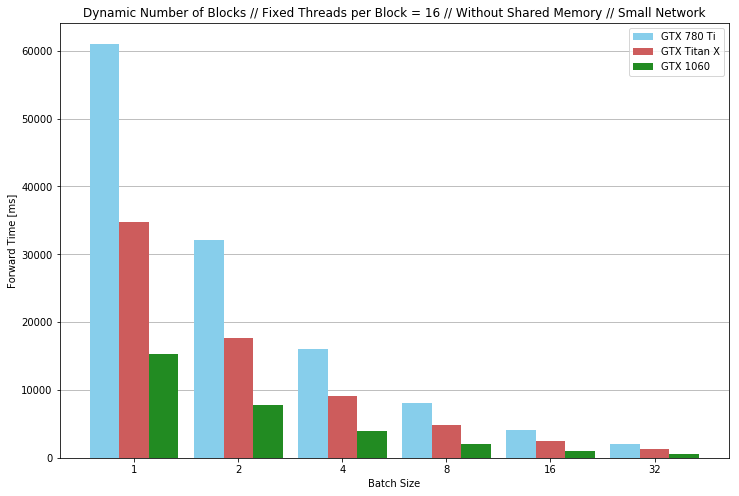

In [6]:
plot_forward_time_for_different_batch_size__part1(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

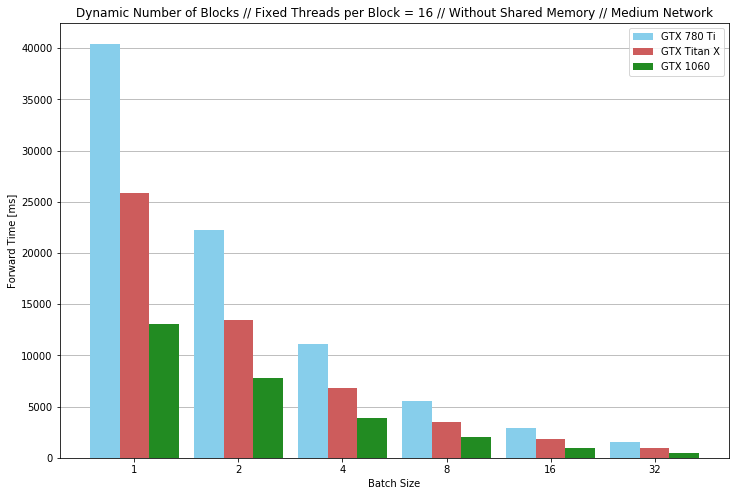

In [7]:
plot_forward_time_for_different_batch_size__part1(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

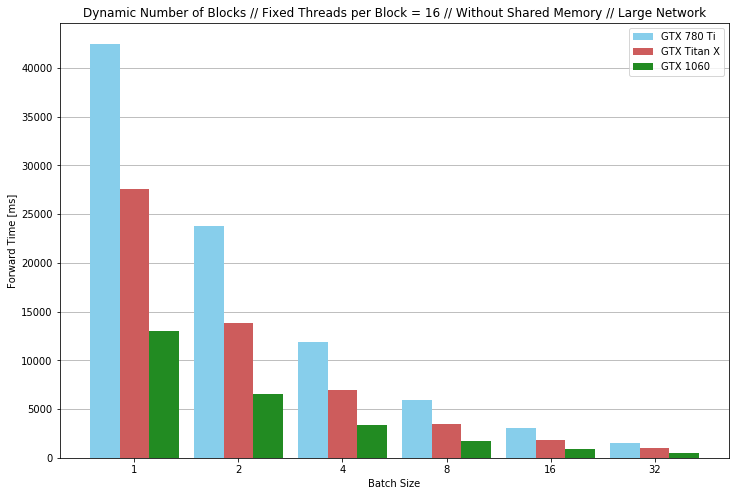

In [8]:
plot_forward_time_for_different_batch_size__part1(LARGE_NETWORK, 'Large Network')

## [PART 1] Different Batch Size // Backward Time // Without shared memory

In [9]:
def plot_backward_time_for_different_batch_size__part1(network_size, network_name):    
    experiments = BATCH_SIZE_EXPERIMENTS__SHARED_MEMORY_OFF__PART1
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_backward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)
        
    ax.set_xlabel('Batch Size')
    ax.set_ylabel('Backward Time [ms]')
    ax.set_title('Dynamic Number of Blocks // Fixed Threads per Block = 16 // Without Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([experiment.batch_size for experiment in experiments])
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

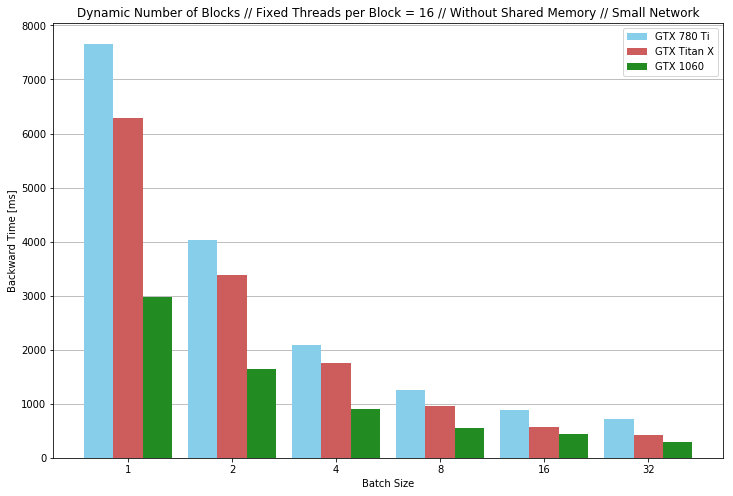

In [10]:
plot_backward_time_for_different_batch_size__part1(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

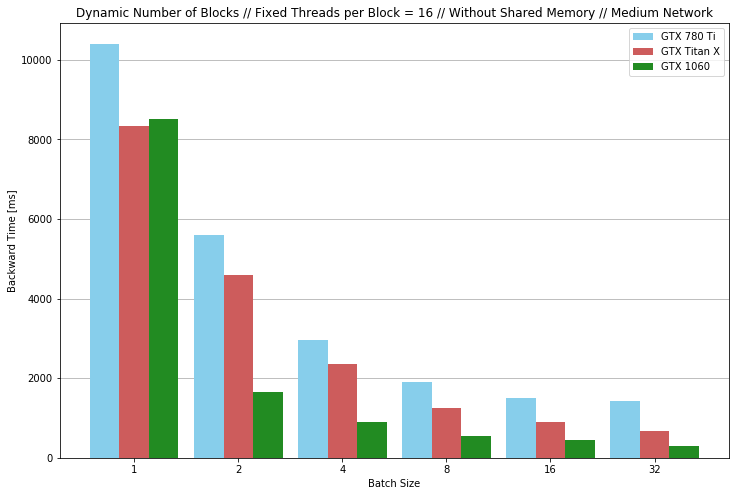

In [11]:
plot_backward_time_for_different_batch_size__part1(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

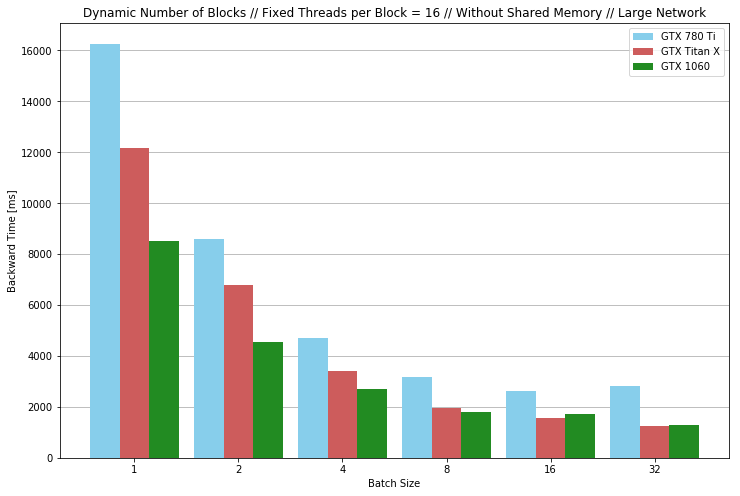

In [12]:
plot_backward_time_for_different_batch_size__part1(LARGE_NETWORK, 'Large Network')

## [PART 2] Different Batch Size // Forward Time // Without shared memory

In [13]:
def plot_forward_time_for_different_batch_size__part2(network_size, network_name):    
    experiments = BATCH_SIZE_EXPERIMENTS__SHARED_MEMORY_OFF__PART2
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_forward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)

    ax.set_xlabel('Batch Size')
    ax.set_ylabel('Forward Time [ms]')
    ax.set_title('Dynamic Number of Blocks // Fixed Threads per Block = 16 // Without Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([experiment.batch_size for experiment in experiments])
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

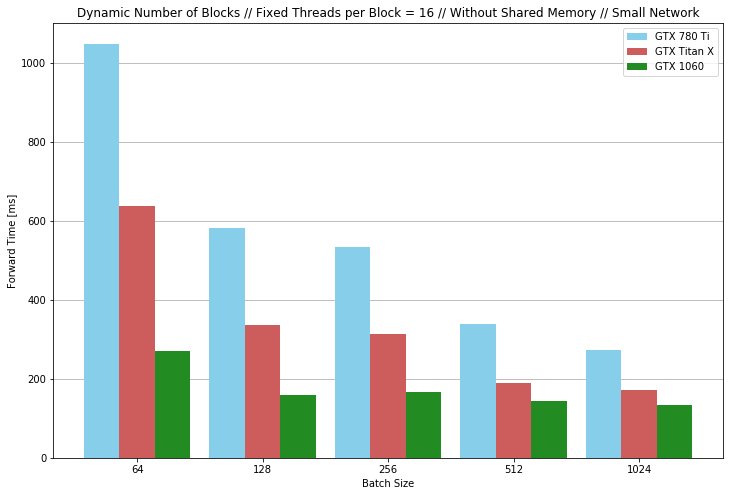

In [14]:
plot_forward_time_for_different_batch_size__part2(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

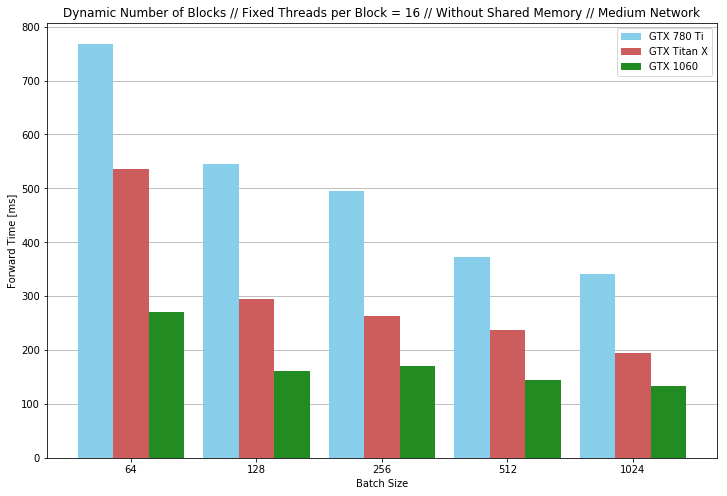

In [15]:
plot_forward_time_for_different_batch_size__part2(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

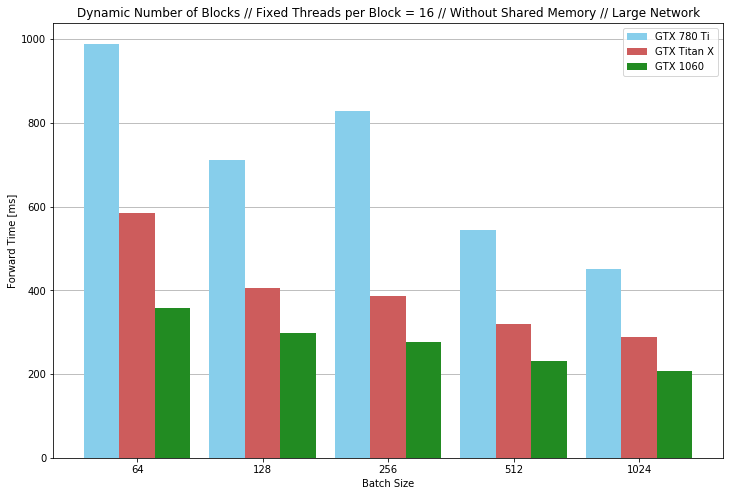

In [16]:
plot_forward_time_for_different_batch_size__part2(LARGE_NETWORK, 'Large Network')

## [PART 2] Different Batch Size // Backward Time // Without shared memory

In [17]:
def plot_backward_time_for_different_batch_size__part2(network_size, network_name):    
    experiments = BATCH_SIZE_EXPERIMENTS__SHARED_MEMORY_OFF__PART2
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_backward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)
        
    ax.set_xlabel('Batch Size')
    ax.set_ylabel('Backward Time [ms]')
    ax.set_title('Dynamic Number of Blocks // Fixed Threads per Block = 16 // Without Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([experiment.batch_size for experiment in experiments])
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

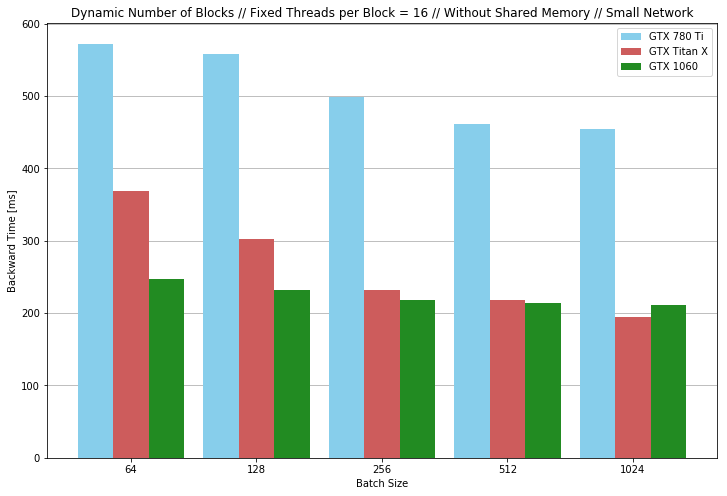

In [18]:
plot_backward_time_for_different_batch_size__part2(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

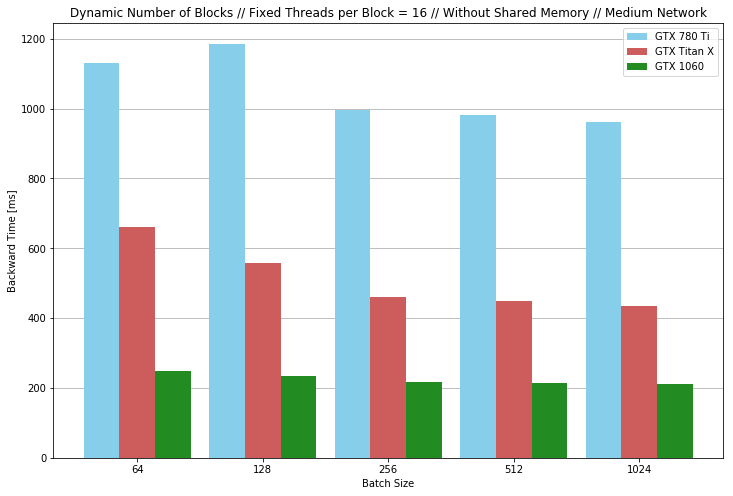

In [19]:
plot_backward_time_for_different_batch_size__part2(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

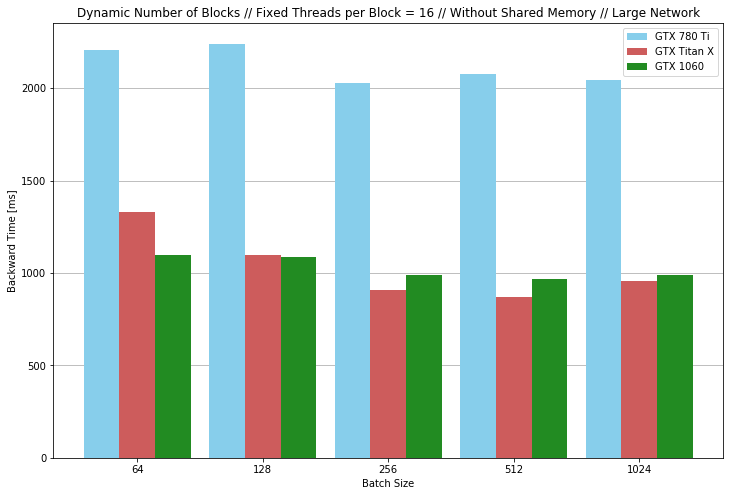

In [20]:
plot_backward_time_for_different_batch_size__part2(LARGE_NETWORK, 'Large Network')

## Different Number of Thread Per Block // Forward Time // Without shared memory

In [21]:
def plot_forward_time_for_different_block_size(network_size, network_name):    
    experiments = BLOCKS_SIZE_EXPERIMENTS__SHARED_MEMORY_OFF
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_forward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)
        
    ax.set_xlabel('Threads per Block')
    ax.set_ylabel('Forward Time [ms]')
    ax.set_title('Fixed Batch Size = 128 // Dynamic Number of Blocks // Without Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([experiment.block_size for experiment in experiments])
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

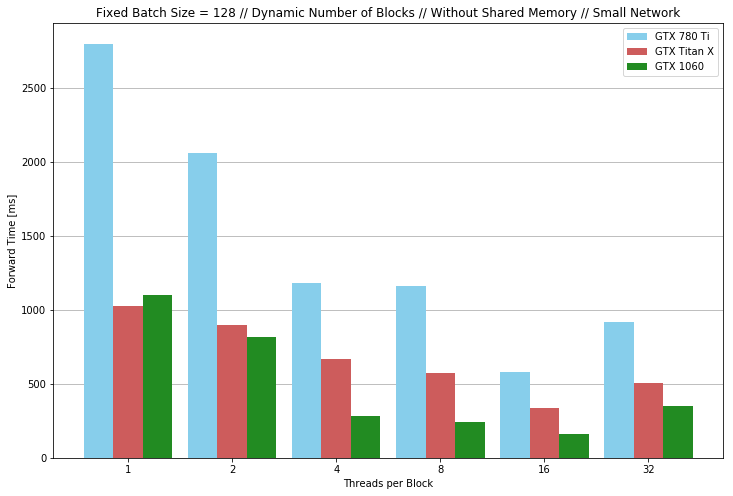

In [22]:
plot_forward_time_for_different_block_size(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

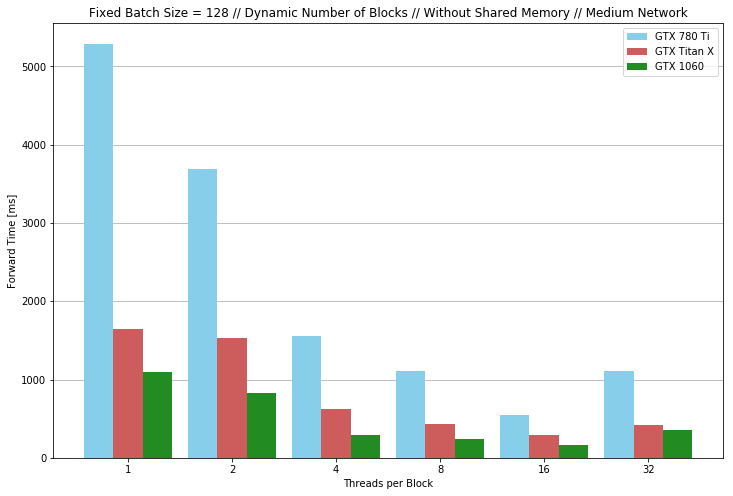

In [23]:
plot_forward_time_for_different_block_size(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

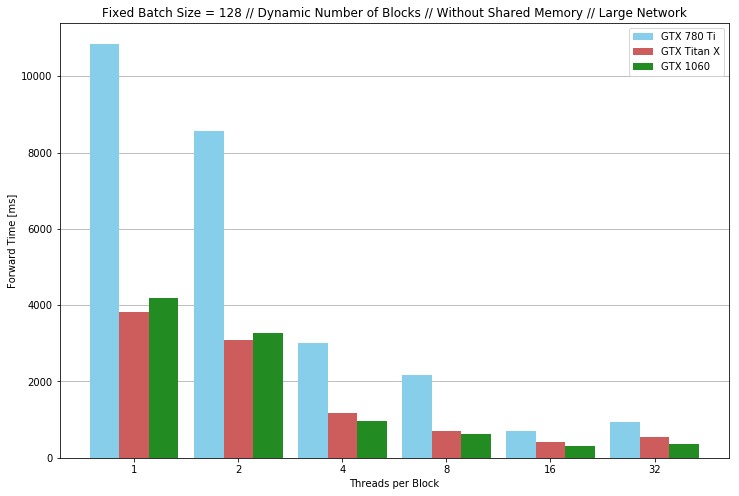

In [24]:
plot_forward_time_for_different_block_size(LARGE_NETWORK, 'Large Network')

## Different Number of Thread Per Block // Backward Time // Without shared memory

In [25]:
def plot_backward_time_for_different_block_size(network_size, network_name):    
    experiments = BLOCKS_SIZE_EXPERIMENTS__SHARED_MEMORY_OFF
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_forward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)
        
    ax.set_xlabel('Threads per Block')
    ax.set_ylabel('Backward Time [ms]')
    ax.set_title('Fixed Batch Size = 128 // Dynamic Number of Blocks // Without Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([experiment.block_size for experiment in experiments])
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

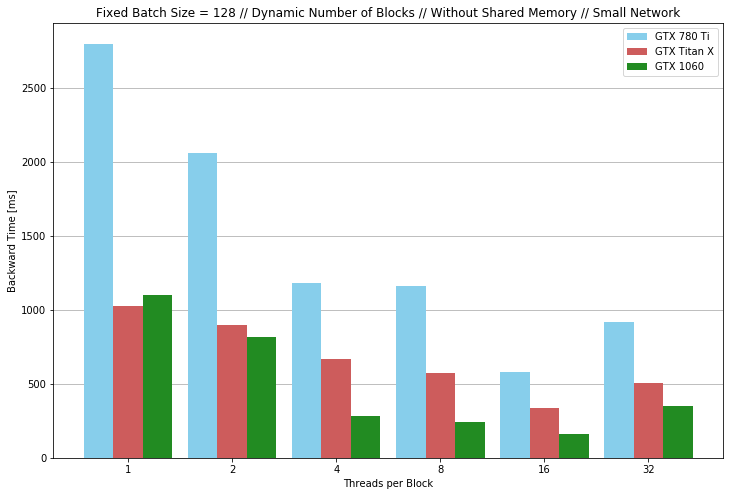

In [26]:
plot_backward_time_for_different_block_size(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

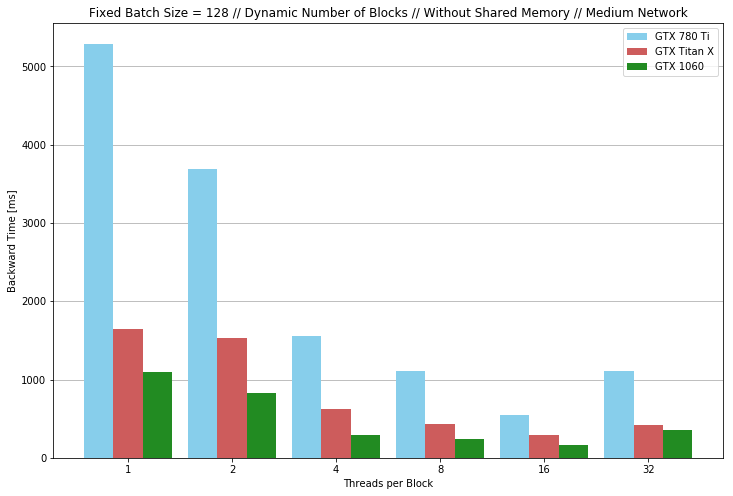

In [27]:
plot_backward_time_for_different_block_size(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

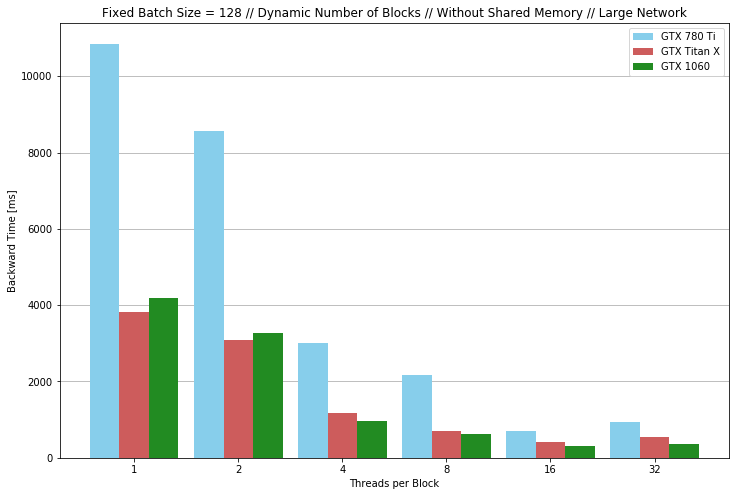

In [28]:
plot_backward_time_for_different_block_size(LARGE_NETWORK, 'Large Network')

## Different Number of Blocks // Forward Time // Without shared memory

In [29]:
def plot_forward_time_for_different_number_of_blocks(network_size, network_name):    
    experiments = BLOCK_NUMBER_EXPERIMENTS__SHARED_MEMORY_OFF
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_forward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)
        
    ax.set_xlabel('Number of Blocks')
    ax.set_ylabel('Forward Time [ms]')
    ax.set_title('Fixed Batch Size = 128 // Fixed Number of Threads = 16 // Without Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([experiment.block_number for experiment in experiments])
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

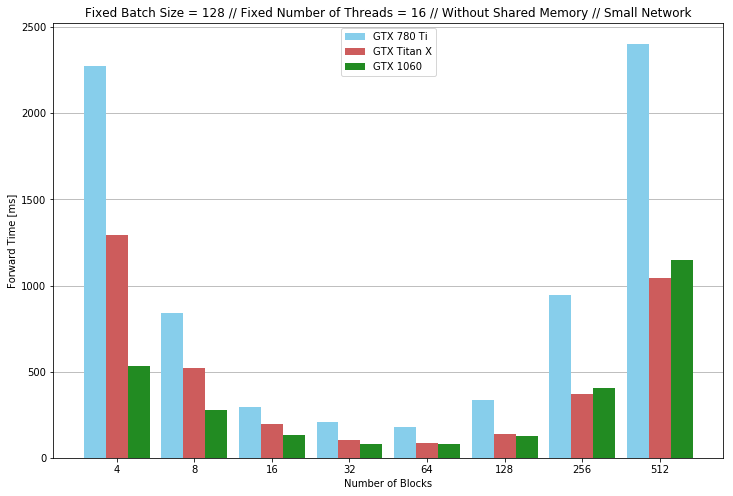

In [30]:
plot_forward_time_for_different_number_of_blocks(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

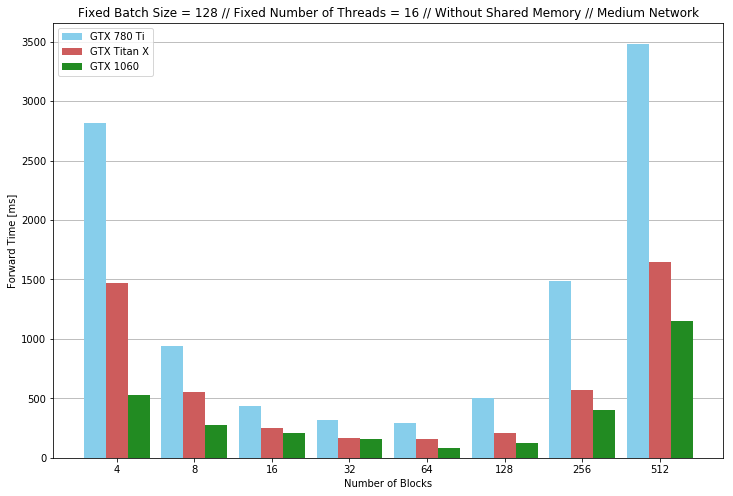

In [31]:
plot_forward_time_for_different_number_of_blocks(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

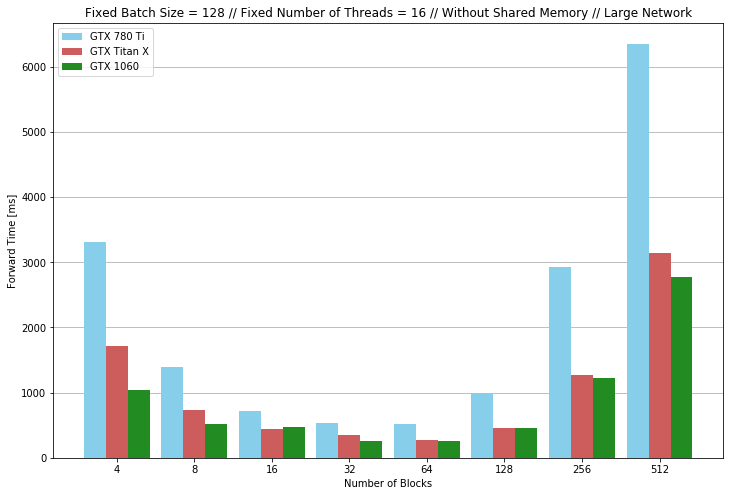

In [32]:
plot_forward_time_for_different_number_of_blocks(LARGE_NETWORK, 'Large Network')

In [33]:
def plot_backward_time_for_different_number_of_blocks(network_size, network_name):    
    experiments = BLOCK_NUMBER_EXPERIMENTS__SHARED_MEMORY_OFF
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_backward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)
        
    ax.set_xlabel('Number of Blocks')
    ax.set_ylabel('Backward Time [ms]')
    ax.set_title('Fixed Batch Size = 128 // Fixed Number of Threads = 16 // Without Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([experiment.block_number for experiment in experiments])
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

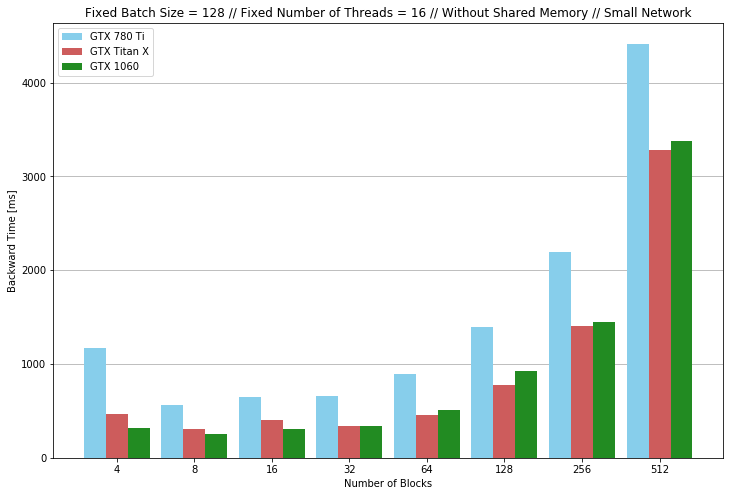

In [34]:
plot_backward_time_for_different_number_of_blocks(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

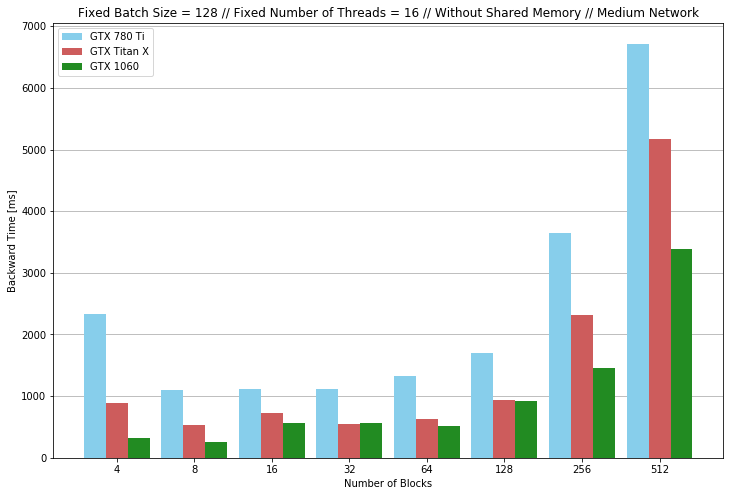

In [35]:
plot_backward_time_for_different_number_of_blocks(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

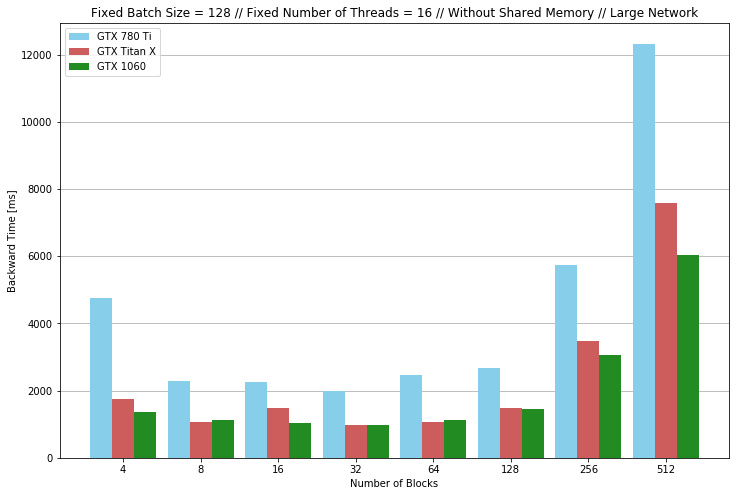

In [36]:
plot_backward_time_for_different_number_of_blocks(LARGE_NETWORK, 'Large Network')

## Different Batch Size // Forward Time // Without shared memory

In [37]:
def plot_forward_time_for_different_batch_size_and_shared_memory(network_size, network_name):    
    experiments = BATCH_SIZE_EXPERIMENTS__SHARED_MEMORY_ON
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_forward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)
        
    ax.set_xlabel('Batch Size')
    ax.set_ylabel('Forward Time [ms]')
    ax.set_title('Fixed Number of Threads = 16 // With Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([experiment.batch_size for experiment in experiments])
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

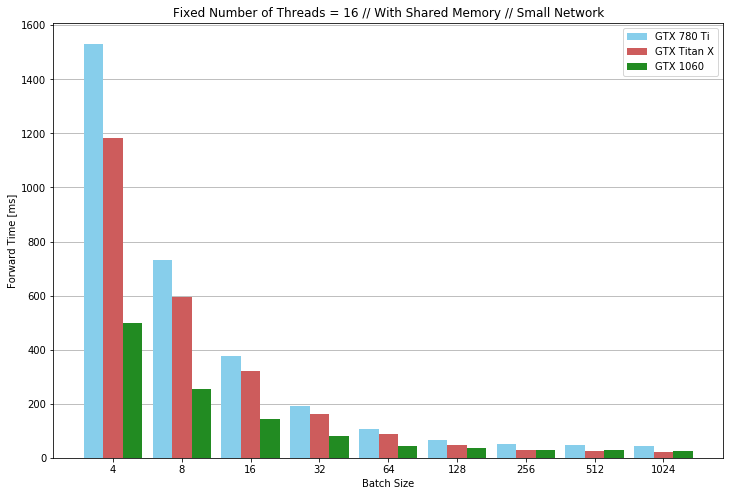

In [38]:
plot_forward_time_for_different_batch_size_and_shared_memory(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

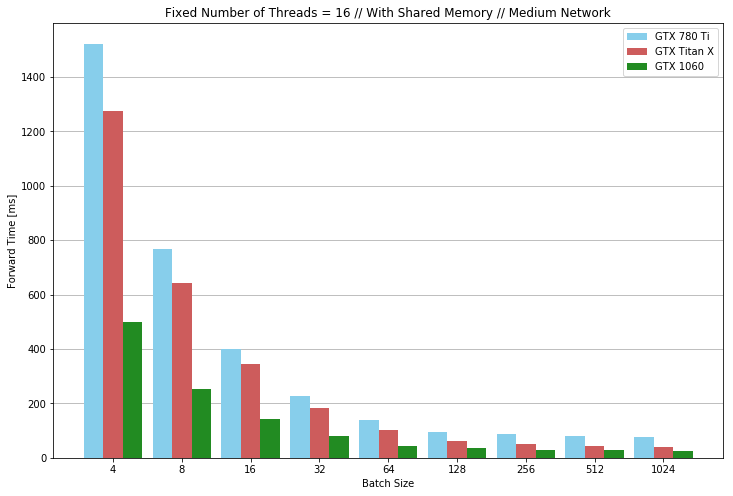

In [39]:
plot_forward_time_for_different_batch_size_and_shared_memory(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

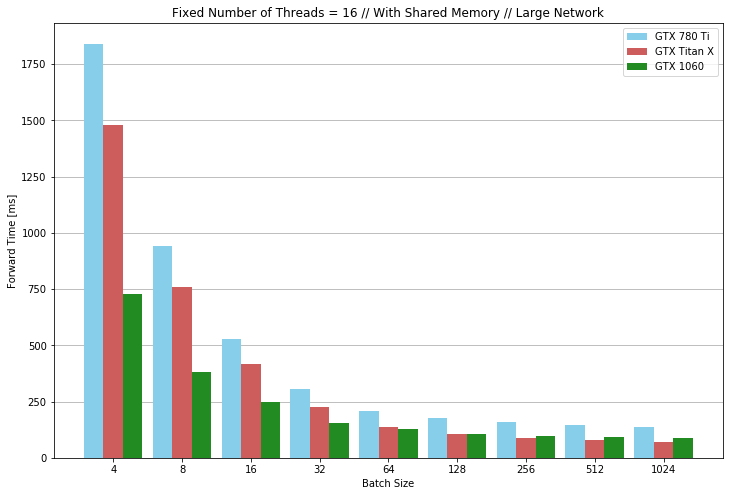

In [40]:
plot_forward_time_for_different_batch_size_and_shared_memory(LARGE_NETWORK, 'Large Network')

In [41]:
def plot_backward_time_for_different_batch_size_and_shared_memory(network_size, network_name):    
    experiments = BATCH_SIZE_EXPERIMENTS__SHARED_MEMORY_ON
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_backward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)
        
    ax.set_xlabel('Batch Size')
    ax.set_ylabel('Backward Time [ms]')
    ax.set_title('Fixed Number of Threads = 16 // With Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([experiment.batch_size for experiment in experiments])
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

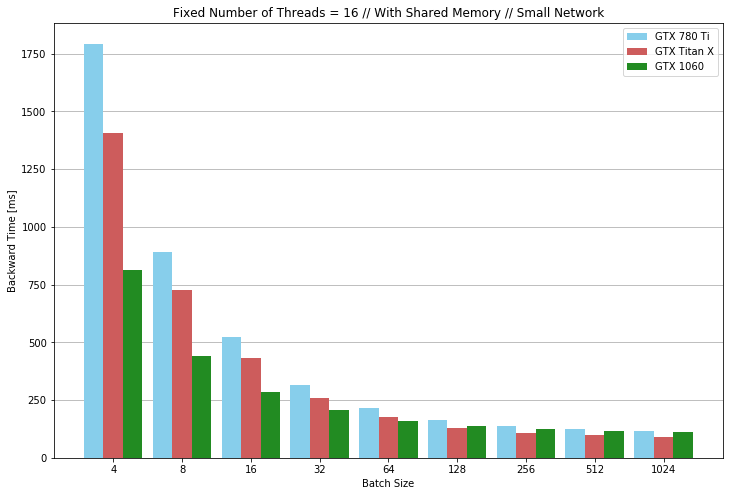

In [42]:
plot_backward_time_for_different_batch_size_and_shared_memory(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

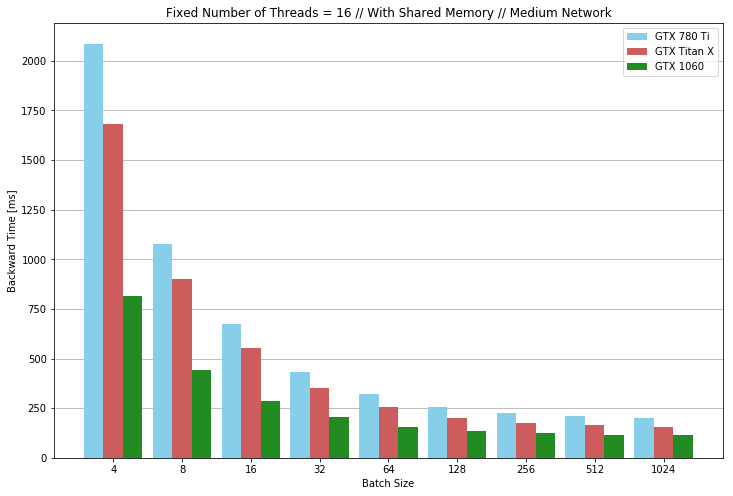

In [43]:
plot_backward_time_for_different_batch_size_and_shared_memory(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

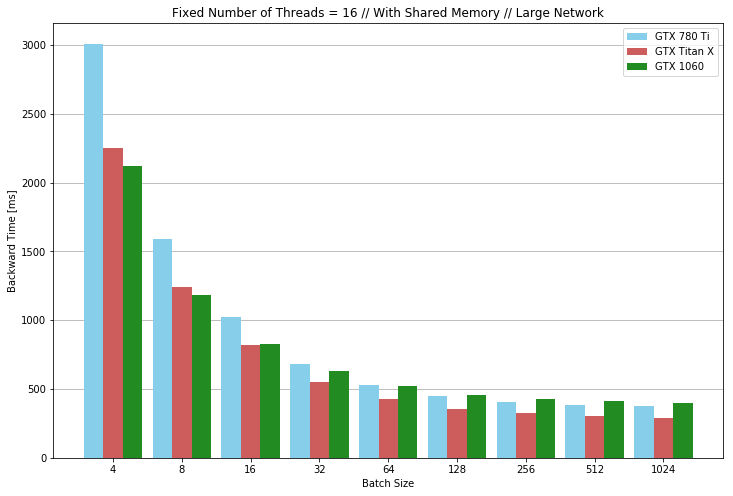

In [44]:
plot_backward_time_for_different_batch_size_and_shared_memory(LARGE_NETWORK, 'Large Network')

## Different Batch Size, Number of Blocks, Number of Threads // Forward Time // Without shared memory

In [45]:
def plot_forward_time_for_different_batch_size_block_number_and_block_size(network_size, network_name):    
    experiments = BATCH_SIZE_BLOCK_NUMBER_AND_BLOCK_SIZE_EXPERIMENTS__SHARED_MEMORY_OFF
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_forward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)
        
    ax.set_xlabel('(Batch Size, Number of Blocks, Threads per Block)')
    ax.set_ylabel('Forward Time [ms]')
    ax.set_title('Variation of all best values // Without Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([(experiment.batch_size, experiment.block_number, experiment.block_size) for experiment in experiments])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=-30, ha="left", rotation_mode="anchor")
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

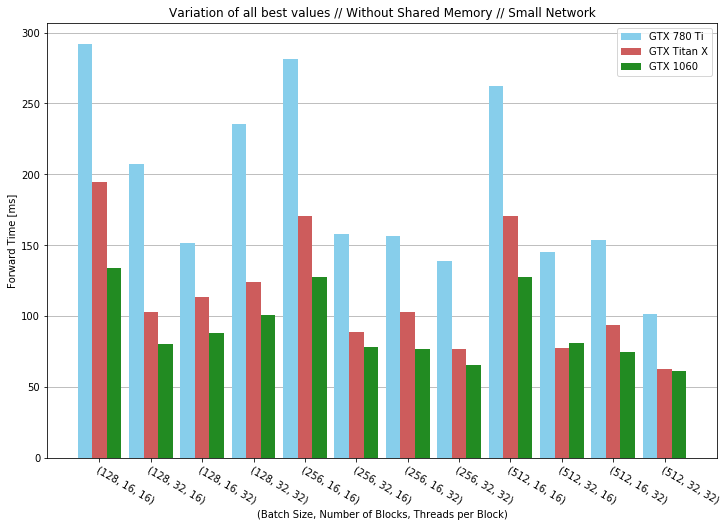

In [46]:
plot_forward_time_for_different_batch_size_block_number_and_block_size(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

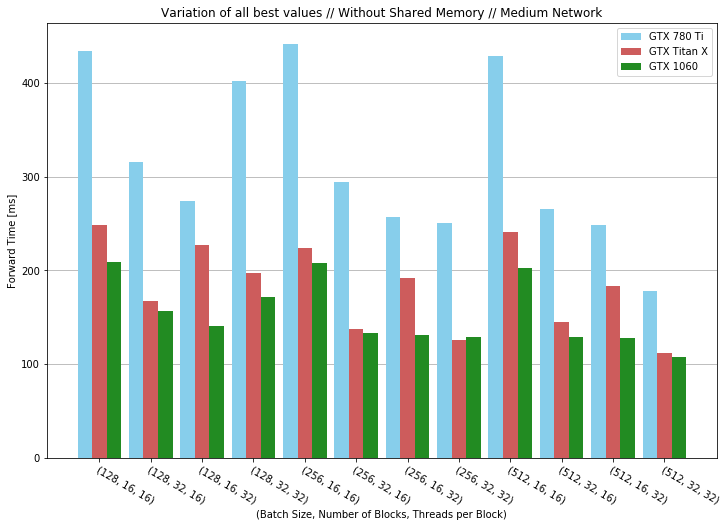

In [47]:
plot_forward_time_for_different_batch_size_block_number_and_block_size(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

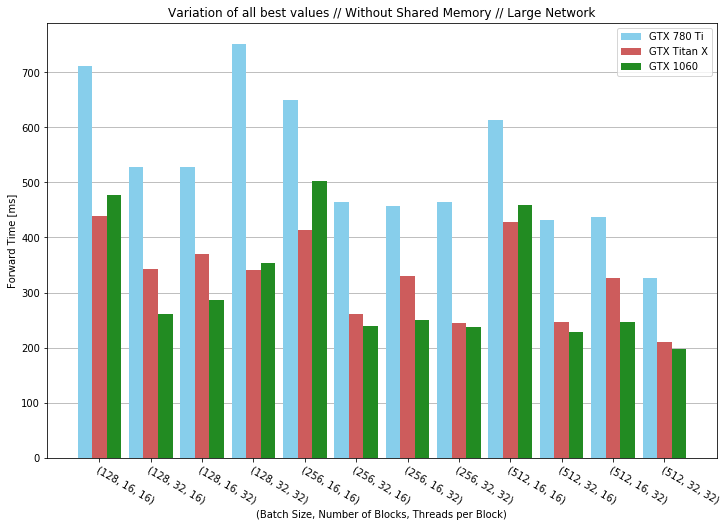

In [48]:
plot_forward_time_for_different_batch_size_block_number_and_block_size(LARGE_NETWORK, 'Large Network')

In [49]:
def plot_backward_time_for_different_batch_size_block_number_and_block_size(network_size, network_name):    
    experiments = BATCH_SIZE_BLOCK_NUMBER_AND_BLOCK_SIZE_EXPERIMENTS__SHARED_MEMORY_OFF
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_backward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)
        
    ax.set_xlabel('(Batch Size, Number of Blocks, Threads per Block)')
    ax.set_ylabel('Backward Time [ms]')
    ax.set_title('Variation of all best values // Without Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([(experiment.batch_size, experiment.block_number, experiment.block_size) for experiment in experiments])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=-30, ha="left", rotation_mode="anchor")
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

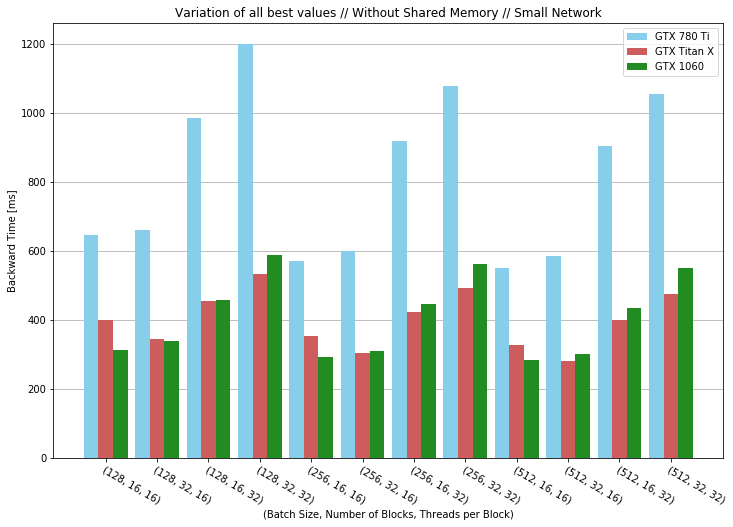

In [50]:
plot_backward_time_for_different_batch_size_block_number_and_block_size(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

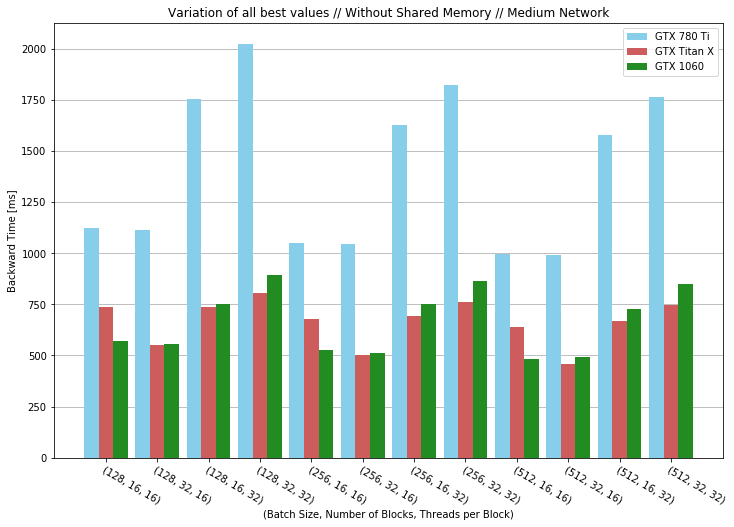

In [51]:
plot_backward_time_for_different_batch_size_block_number_and_block_size(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

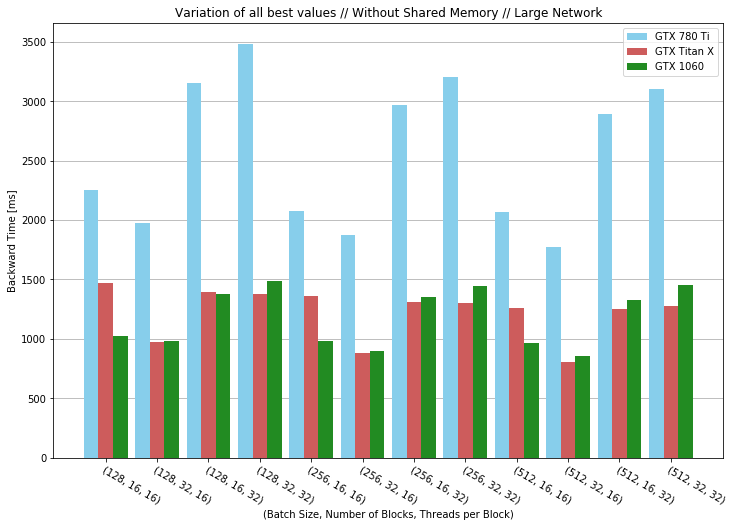

In [52]:
plot_backward_time_for_different_batch_size_block_number_and_block_size(LARGE_NETWORK, 'Large Network')

## Different Batch Size, Number of Blocks, Number of Threads // Forward Time // With shared memory

In [53]:
def plot_forward_time_for_different_batch_size_block_number_and_block_size_and_shared_memory(network_size, network_name):    
    experiments = BATCH_SIZE_BLOCK_NUMBER_AND_BLOCK_SIZE_EXPERIMENTS__SHARED_MEMORY_ON
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_forward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)
        
    ax.set_xlabel('(Batch Size, Threads per Block)')
    ax.set_ylabel('Forward Time [ms]')
    ax.set_title('Variation of all best values // With Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([(experiment.batch_size, experiment.block_size) for experiment in experiments])
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

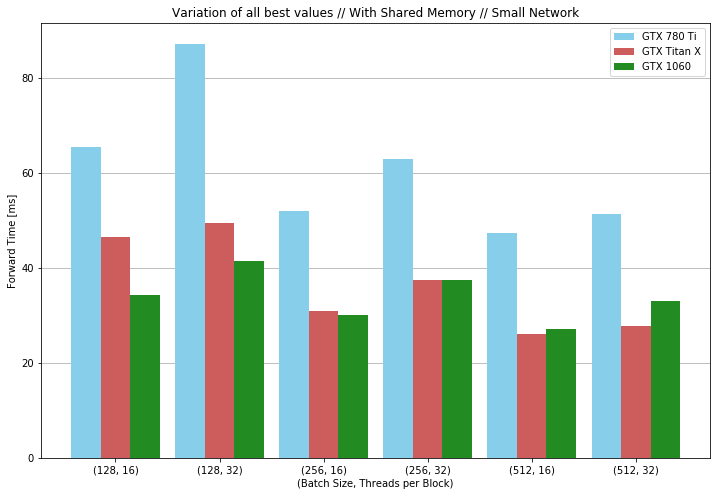

In [54]:
plot_forward_time_for_different_batch_size_block_number_and_block_size_and_shared_memory(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

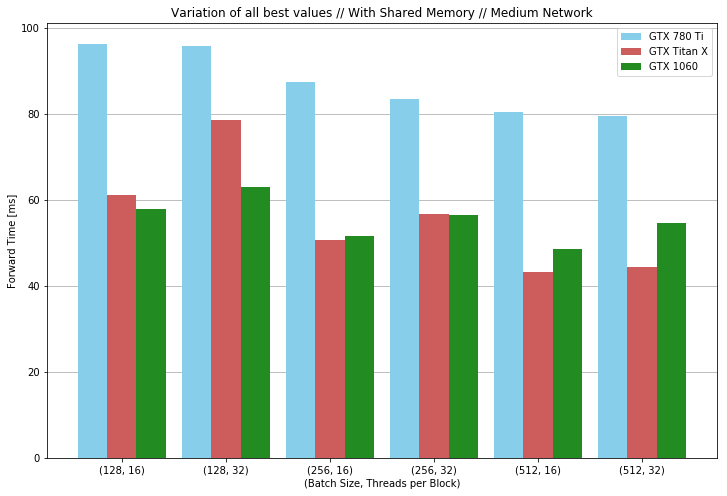

In [55]:
plot_forward_time_for_different_batch_size_block_number_and_block_size_and_shared_memory(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

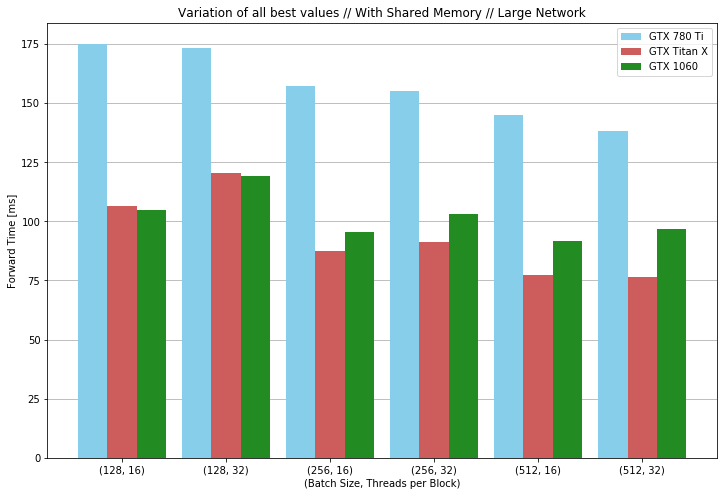

In [56]:
plot_forward_time_for_different_batch_size_block_number_and_block_size_and_shared_memory(LARGE_NETWORK, 'Large Network')

In [57]:
def plot_backward_time_for_different_batch_size_block_number_and_block_size_and_shared_memory(network_size, network_name):    
    experiments = BATCH_SIZE_BLOCK_NUMBER_AND_BLOCK_SIZE_EXPERIMENTS__SHARED_MEMORY_ON
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.grid(axis='y', zorder=0)
    for gpu_idx, gpu_name in enumerate(GPU_NAMES):
        x_pos = [idx + BAR_WIDTH * (gpu_idx-1) for idx in range(len(experiments))]
        y_values = [get_total_backward_time(network_size, gpu_name, experiment) for experiment in experiments]
        ax.bar(x_pos, y_values, BAR_WIDTH, color=BAR_COLORS[gpu_idx], label=gpu_name, zorder=3)
        
    ax.set_xlabel('(Batch Size, Threads per Block)')
    ax.set_ylabel('Backward Time [ms]')
    ax.set_title('Variation of all best values // With Shared Memory // {}'.format(network_name))
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels([(experiment.batch_size, experiment.block_size) for experiment in experiments])
    ax.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

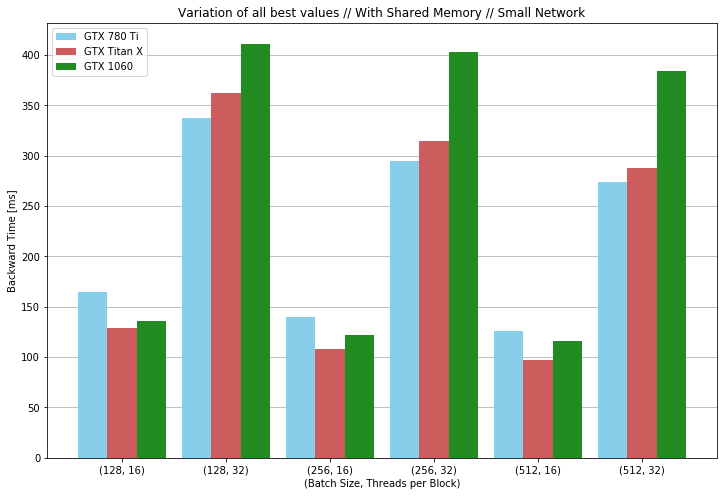

In [58]:
plot_backward_time_for_different_batch_size_block_number_and_block_size_and_shared_memory(SMALL_NETWORK, 'Small Network')

<Figure size 864x576 with 0 Axes>

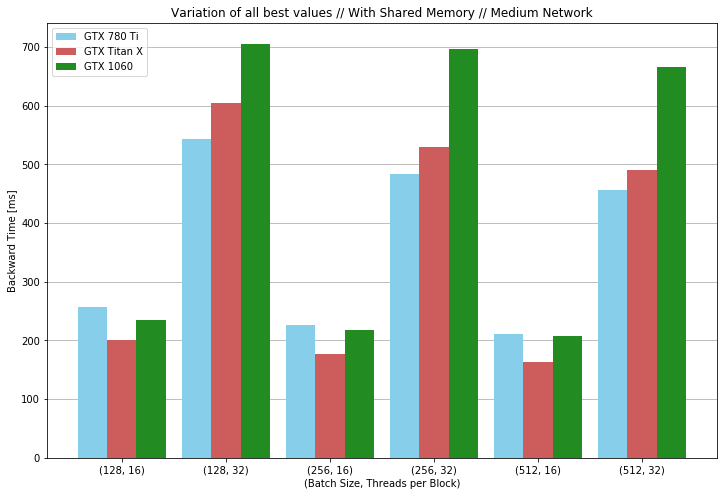

In [59]:
plot_backward_time_for_different_batch_size_block_number_and_block_size_and_shared_memory(MEDIUM_NETWORK, 'Medium Network')

<Figure size 864x576 with 0 Axes>

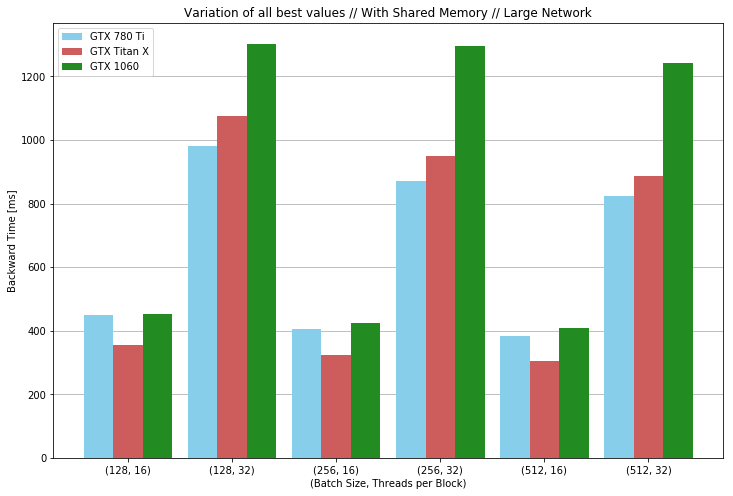

In [60]:
plot_backward_time_for_different_batch_size_block_number_and_block_size_and_shared_memory(LARGE_NETWORK, 'Large Network')